<a href="https://colab.research.google.com/github/AmareshMuddebihal/Machine-Learning-/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

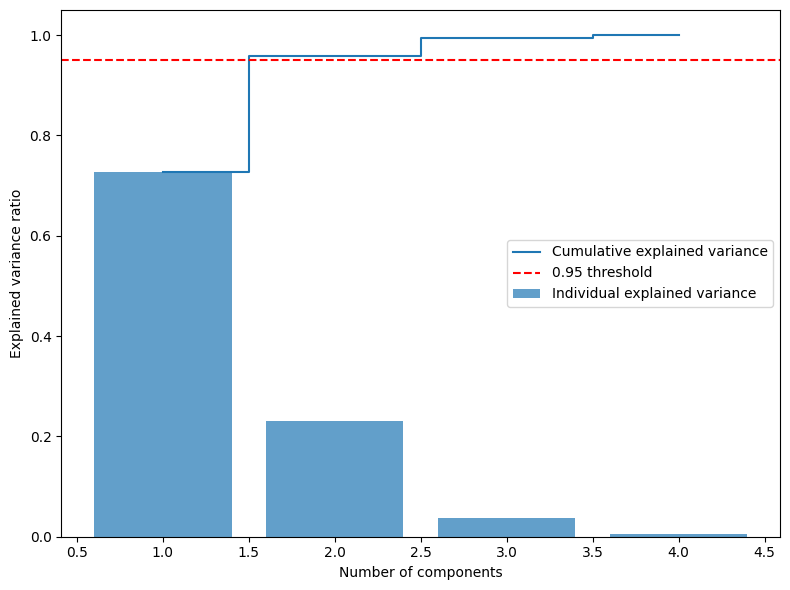

          PC1       PC2     Iris-setosa
0   -2.107950 -0.644276     Iris-setosa
1   -2.387971 -0.305833     Iris-setosa
2   -2.324879 -0.562923     Iris-setosa
3   -2.405086  0.687591     Iris-setosa
4   -2.083204  1.530252     Iris-setosa
..        ...       ...             ...
144  1.859771  0.379344  Iris-virginica
145  1.542004 -0.908086  Iris-virginica
146  1.509255  0.264606  Iris-virginica
147  1.369096  1.015839  Iris-virginica
148  0.946803 -0.021821  Iris-virginica

[149 rows x 3 columns]


In [6]:
#Amaresh Muddebihal 20030141IT015
#i)Principal Component Analysis
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from CSV file
file_path = '/content/iris.data.csv'
data = pd.read_csv(file_path)

# Separate features from the target variable (if applicable)
#
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Determine the number of components for a certain explained variance threshold
threshold = 0.95  # Set your desired threshold
num_components = sum(cumulative_variance < threshold) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_features)

# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold} threshold')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# The transformed data using principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])


final_data = pd.concat([principal_df, target], axis=1)

# Display the final data with principal components
print(final_data)
